<a href="https://colab.research.google.com/github/yuguerten/Casablanca-housing/blob/main/Casablanca_Housing_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv("/content/housing_data.csv",encoding='latin-1')

In [11]:
housing.head()

,Location,Num_rooms,House_area(m²),Price(DH)
0,Oulfa Casablanca,3,116,980.0
1,Casablanca Marina Casablanca,2,142,530.0
2,Ain Diab Casablanca,3,280,450.0
3,Anfa Supérieur Casablanca,3,110,165.0
4,Les Hopitaux Casablanca,2,113,156.0


In [5]:
housing.shape

(594, 4)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        594 non-null    object 
 1   Num_rooms       594 non-null    int64  
 2   House_area(m²)  594 non-null    int64  
 3   Price(DH)       594 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.7+ KB


In [7]:
casablanca_housing = housing[['Num_rooms', 'House_area(m²)', 'Price(DH)']]

In [9]:
casablanca_housing.head()

,Num_rooms,House_area(m²),Price(DH)
0,3,116,980.0
1,2,142,530.0
2,3,280,450.0
3,3,110,165.0
4,2,113,156.0


array([[<Axes: title={'center': 'Num_rooms'}>,
        <Axes: title={'center': 'House_area(m²)'}>],
       [<Axes: title={'center': 'Price(DH)'}>, <Axes: >]], dtype=object)

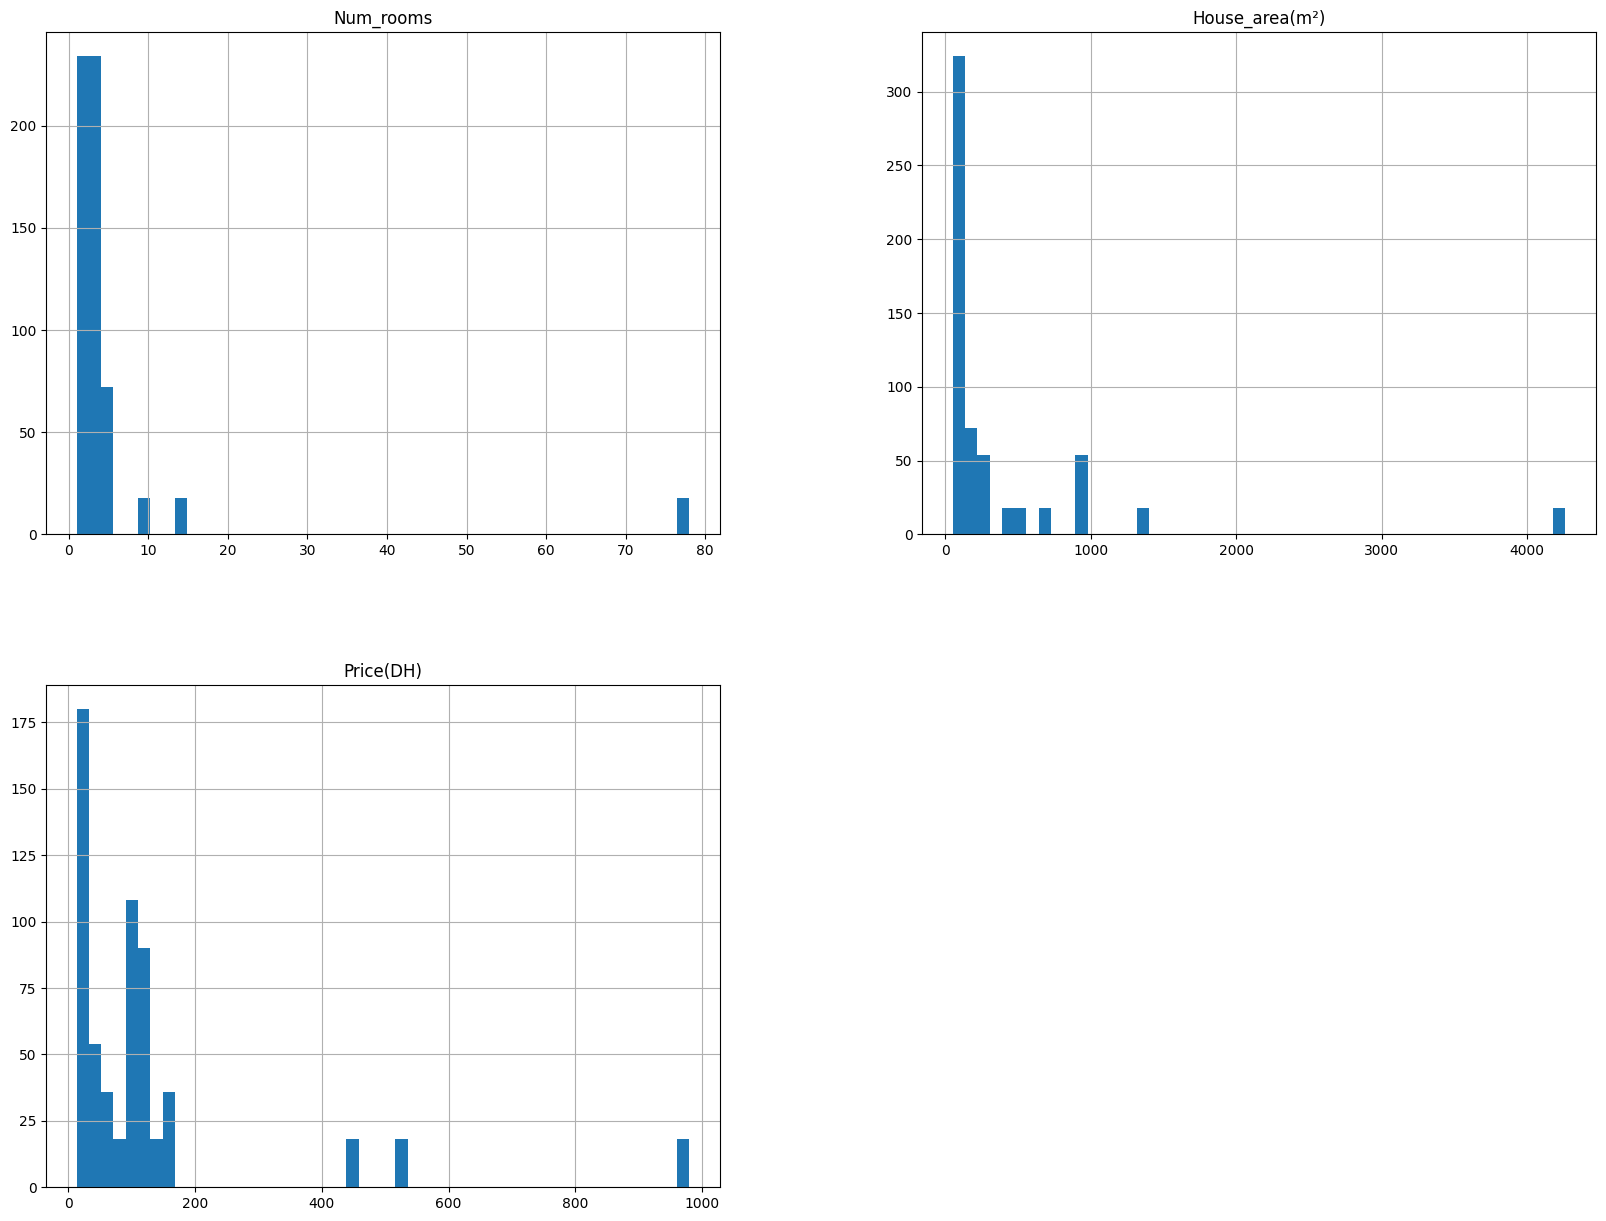

In [10]:
casablanca_housing.hist(bins=50,figsize=(20,15))

In [21]:
housing = casablanca_housing.drop_duplicates()
housing.shape

(32, 3)

In [23]:
housing_corr = housing.corr()
housing_corr

,Num_rooms,House_area(m²),Price(DH)
Num_rooms,1.000000,0.960844,-0.098681
House_area(m²),0.960844,1.000000,-0.162183
Price(DH),-0.098681,-0.162183,1.000000


In [34]:
housing_corr["Num_rooms"].sort_values(ascending=False)

Num_rooms         1.000000
House_area(m²)    0.960844
Price(DH)        -0.098681
Name: Num_rooms, dtype: float64

In [72]:
X=housing.drop(['Num_rooms'], axis='columns')
X.head()
y=housing['Num_rooms']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train, y_train)

LinearRegression()

In [75]:
#display the intercept and coefficient
print(" the intercept is " +  str(OLS.intercept_))
print(" the coeffiients are " +  str(OLS.coef_))
print(" the R_sqaured value is " +  str(OLS.score(X_train, y_train)))

 the intercept is -1.210424658803352
 the coeffiients are [0.01732129 0.00292125]
 the R_sqaured value is 0.9452510002064319


In [83]:
#predicting with OLS
y_pred=OLS.predict(X_test)
performance = pd.DataFrame({'PREDICTIONS': y_pred, 'ACTUAL VALUES':y_test})
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
30,10.958299,4,-6.958299
16,0.158336,1,0.841664
25,22.231746,14,-8.231746
18,0.293160,2,1.706840
8,2.125024,3,0.874976


In [84]:
#preparing data for plotting
performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,10.958299,4,-6.958299
1,1,0.158336,1,0.841664
2,2,22.231746,14,-8.231746
3,3,0.293160,2,1.706840
4,4,2.125024,3,0.874976


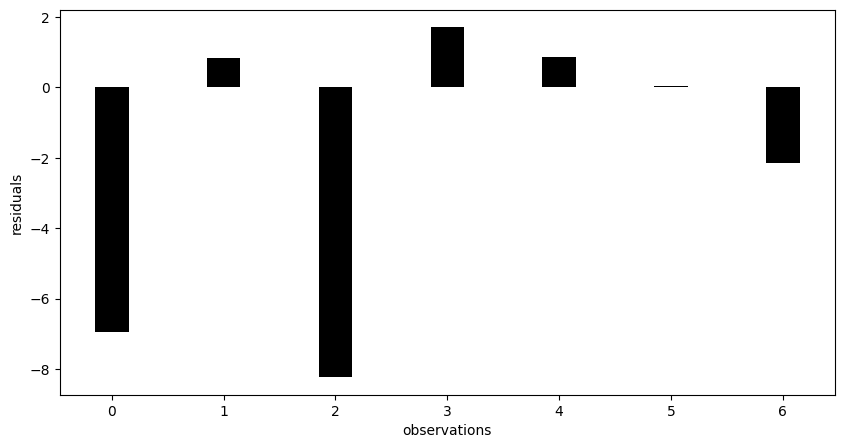

In [85]:
#plot the residuals
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=performance[:50], color='black', width=0.3)
plt.ylabel('residuals')
plt.xlabel('observations')
plt.show()

In [86]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_train.head()

,const,House_area(m²),Price(DH)
26,1.0,897,16.0
13,1.0,92,105.0
0,1.0,116,980.0
4,1.0,113,156.0
17,1.0,115,72.0


In [87]:
nicer_OLS=sm.OLS(y_train,X_train).fit()
nicer_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Num_rooms   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     189.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.32e-14
Time:                        18:48:59   Log-Likelihood:                -66.463
No. Observations:                  25   AIC:                             138.9
Df Residuals:                      22   BIC:                             142.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2104      0.989     -1.224      0.234      -3.261       0.840
House_area(m²)     0.0173      0.001     19.379      0.000       0.015       0.019
Price(DH)          0.0029      0.004      0.827      0.417      -0.004       0.010
==============================================================================
Omnibus:                       16.044   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.437
Skew:                          -1.655   Prob(JB):                     0.000270
Kurtosis:                       5.197   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""